In [1]:
import os
import pdb
import pandas as pd
import numpy as np
import ast_functions as ast

In [2]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

### Read ms-ast dataset

In [3]:
os.chdir('/Users/ethanchan/AST-ML/exported_data/')
ms_ast_df = pd.read_csv(f'pd_df_bin=1.csv')
s_id, r_id = ast.get_s_r_id()
ms_ast_df

,S-1,S-2,S-3,S-4,S-5,S-6,S-7,S-8,S-9,S-10,...,R-1259,R-1260,R-1261,R-1262,R-1263,R-1264,R-1265,R-1266,R-1267,R-1268
pk-2000,0,0,0,0,0,0,0,0,0,103171,...,0,0,0,0,0,0,0,0,0,0
pk-2001,0,0,0,0,60537,59179,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pk-2002,0,0,0,0,0,0,0,118515,132154,0,...,0,0,0,0,0,201394,0,0,21674,0
pk-2003,0,0,0,0,0,0,39258,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pk-2004,0,0,26495,0,0,0,0,0,0,0,...,28454,0,0,0,25316,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pk-19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pk-19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pk-19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pk-19999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model: Decision Tree

### Read naive support vector classifier dataset

In [107]:
os.chdir('/Users/ethanchan/AST-ML/exported_data/')
# read dataset from naive support vector classifier
df = pd.read_csv('best_acc_&_alphas_no_0.csv')
# filter df using confidence level
conf = 5
acc = 70
filt = (df['confidence'] >= conf) & (df['accuracy'] >= acc)
df = df[filt]
df

,accuracy,sensitivity,specificity,alpha,orientation,confidence
pk-2221,73.73,77.00,55.56,201046.5,1,5
pk-2249,85.95,87.61,62.50,12101.0,0,5
pk-2414,92.16,98.41,62.96,573.5,0,6
pk-2415,90.53,95.61,63.16,21508.0,0,10
pk-2424,84.52,84.77,75.00,3052.0,0,6
...,...,...,...,...,...,...
pk-4497,70.16,60.87,71.43,60831.5,0,8
pk-4564,74.79,100.00,70.87,7811.0,1,5
pk-4797,81.94,82.01,80.00,1080.5,0,6
pk-6593,76.85,78.49,58.82,415.5,0,8


### Generate decision tree input feature dataset

In [108]:
dt_input_df = pd.DataFrame(index=ms_ast_df.columns.values, columns=df.index.values)
for idx in df.index.values:
    dt_input_df.loc[:, idx] = ms_ast_df.loc[idx, :]
    
# result: sensitive = 1, resistant = 0
result_arr = np.concatenate((np.ones((len(s_id),), dtype=int), np.zeros((len(r_id),), dtype=int)), axis=None)
dt_input_df.insert(0, 'Result', result_arr)
dt_input_df

,Result,pk-2221,pk-2249,pk-2414,pk-2415,pk-2424,pk-2425,pk-2430,pk-2437,pk-2438,...,pk-3892,pk-4457,pk-4458,pk-4484,pk-4485,pk-4497,pk-4564,pk-4797,pk-6593,pk-6594
S-1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1218994,0,0,0,0,0
S-2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1873591,0,0,0,0
S-3,1,0,0,11376,0,0,0,0,0,0,...,0,48802,0,0,0,268130,0,0,0,0
S-4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,408547,0,0,0,0,286394
S-5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R-1264,0,0,2060432,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R-1265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R-1266,0,0,0,0,16359790,0,0,0,0,1226603,...,0,0,0,0,0,0,0,0,0,0
R-1267,0,0,0,0,88431728,0,0,0,2104592,0,...,500418,0,0,0,165468,0,0,0,0,0


In [109]:
# shuffle
x = dt_input_df.sample(frac=1, random_state=1).reset_index(drop=True)
y = x.loc[:, 'Result']  # label: S or R
x = x.drop(columns=['Result'])  # feature: peaks

In [110]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Fit dataset with decision tree

#### Decision tree (aic, bic)

In [111]:
# normal decision tree
from sklearn.tree import DecisionTreeClassifier

depth = 5
tree = DecisionTreeClassifier(max_depth=depth, random_state=1)
tree.fit(x_train, y_train)
print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))

0.6663301362948006
0.6370967741935484


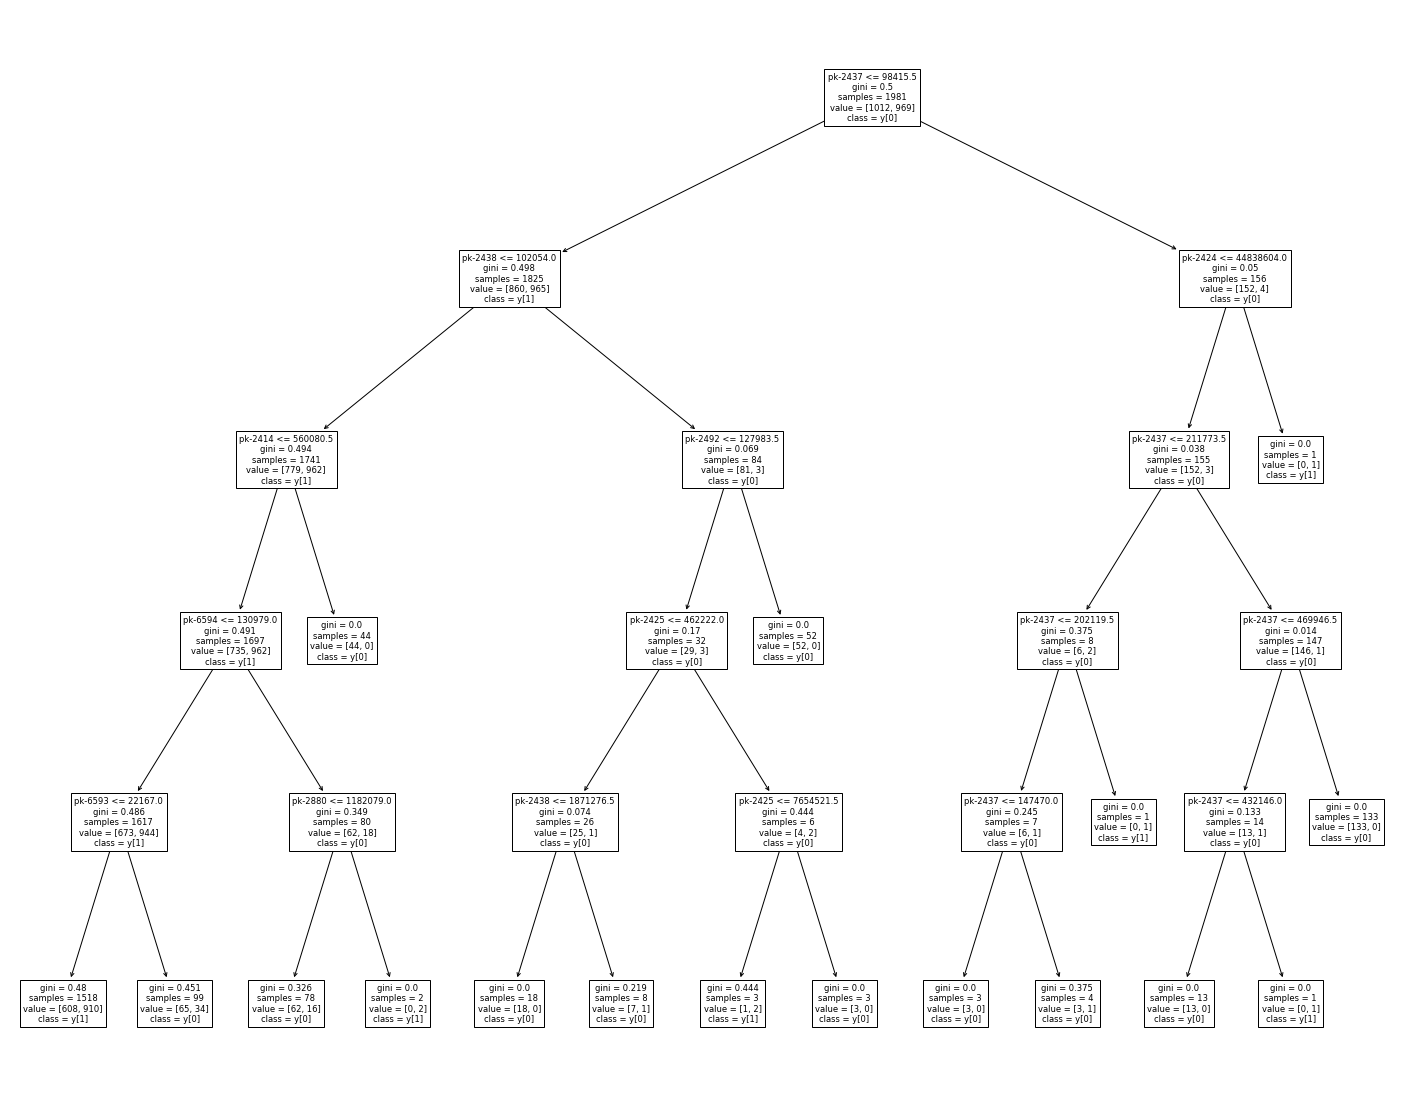

In [95]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree, feature_names=df.index.values, class_names=True)
fig.savefig("decistion_tree.png")

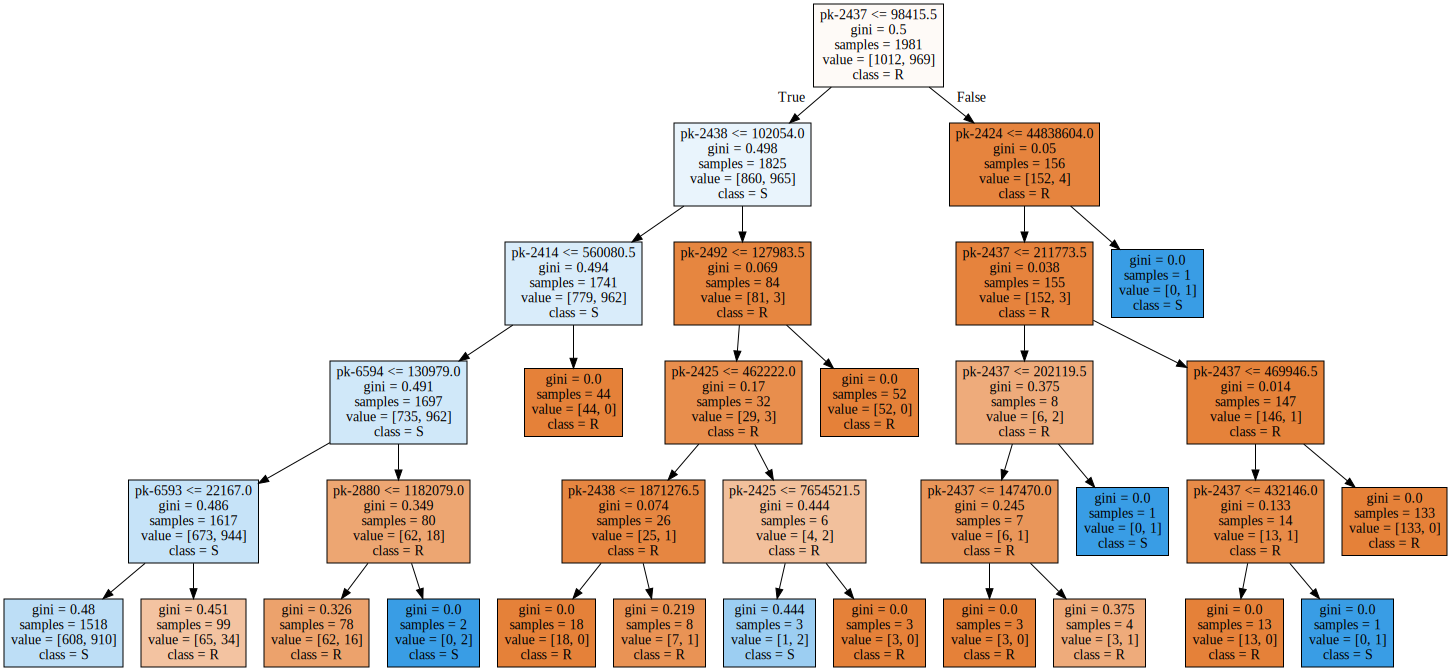

In [115]:
import graphviz

os.chdir('/Users/ethanchan/AST-ML/pics/')
# DOT data
dot_data = export_graphviz(tree,
                           out_file=None, 
                           feature_names=df.index.values,
                           class_names=['R','S'],
                           filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="pdf")
# graph.render("decision_tree_graphivz")
graph.render(f'DesTree-filt@conf={conf},acc={acc}/fit@depth={depth}')
graph

In [80]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=df.index.values, class_names=['S','R'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf(r'/Users/ethanchan/AST-ML/pics/decision_tree_1.pdf')

ModuleNotFoundError: No module named 'sklearn.externals.six'

#### Decision tree with bagging

In [76]:
# decision tree with bagging
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(random_state=32)
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.9, random_state=32)
bag = bag.fit(x_train, y_train)
bag.score(x_test, y_test)

0.6370967741935484

In [49]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
export_graphviz(bag, out_file=dot_data, feature_names=df.index.values)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf(r'/Users/ethanchan/AST-ML/pics/bagging_tree_1.pdf')

NotFittedError: This BaggingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

#### Random forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=32)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6653225806451613

In [18]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=df.index.values)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf(r'/Users/ethanchan/AST-ML/pics/random_forest_1.pdf')

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.